**image classification : CIFAR10 Dataset**

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import utils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Loading Data

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(X_train.shape, X_test.shape)  # Print the shapes of the training and test data arrays

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
# Convert 2D array to 1D
y_train = y_train.reshape(-1,)  # Reshape the array of labels for training data from 2D to 1D
y_train  # Print the reshaped array of labels for training data

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
# Define the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Data PreProcessing

In [6]:
# Reshape the input data to add a channel dimension (grayscale)
x_train = np.expand_dims(X_train, axis=-1)  # Expand the dimensions of the training image data array by adding an extra dimension at the end
x_test = np.expand_dims(X_test, axis=-1)  # Expand the dimensions of the test image data array by adding an extra dimension at the end


In [7]:
# Normalize pixel values to the range [0, 1]
X_train_normalized = x_train / 255.0  # Normalize the training image data by dividing by 255.0 to scale pixel values between 0 and 1
X_test_normalized = x_test / 255.0  # Normalize the test image data by dividing by 255.0 to scale pixel values between 0 and 1


In [8]:
# Convert labels to one-hot encoding
num_classes = 10  # Define the number of classes in the classification task

y_train_one_hot = utils.to_categorical(y_train, num_classes)  # Convert the training labels to one-hot encoded format using to_categorical
y_test_one_hot = utils.to_categorical(y_test, num_classes)  # Convert the test labels to one-hot encoded format using to_categorical

# EDA

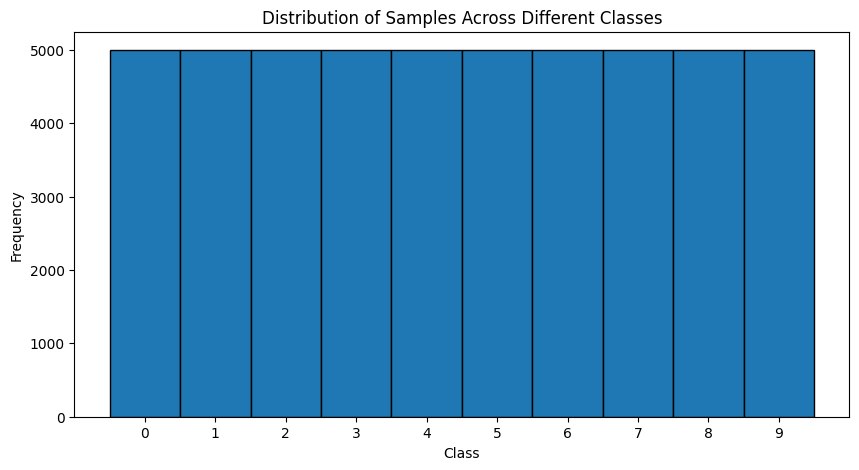

In [9]:
# Class Distribution
plt.figure(figsize=(10, 5))  # Create a new figure with a specific size for plotting

# Plot a histogram of the training labels (y_train) with bins representing each class
# Edgecolor is set to black and alignment is set to left for better visualization
plt.hist(y_train, bins=range(11), edgecolor='black', align='left')

plt.xticks(range(10))  # Set x-axis ticks to correspond to class labels
plt.xlabel('Class')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Distribution of Samples Across Different Classes')  # Set title of the plot
plt.show()  # Display the plot


This visual illustration depicts an evenly distributed allocation of samples among the ten classes.








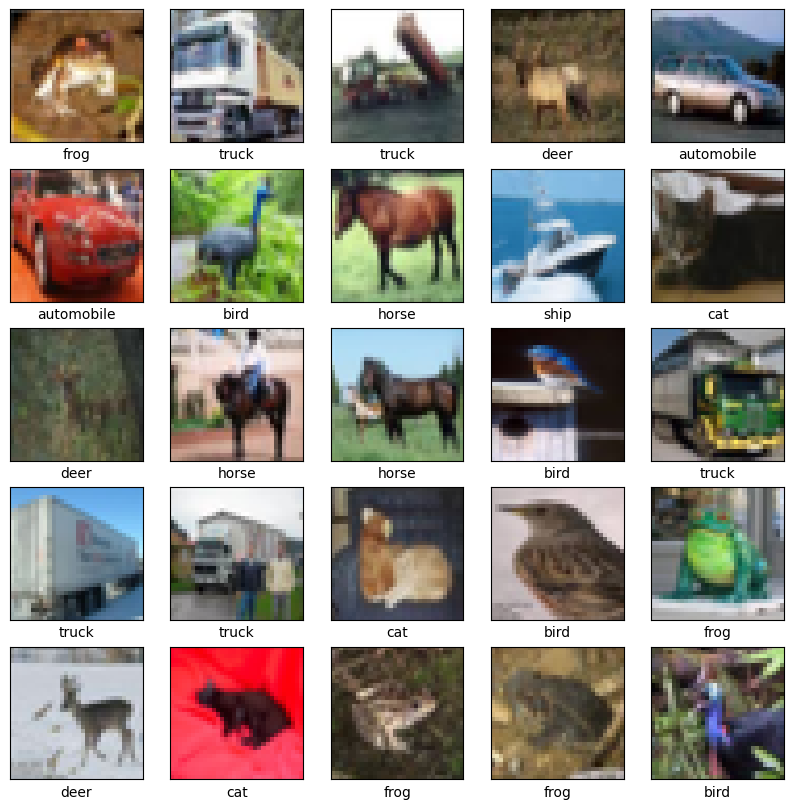

In [11]:
# Sample Images
plt.figure(figsize=(10, 10))  # Create a new figure with a specific size for plotting

# Loop through the first 25 samples in the training dataset
for i in range(25):
    plt.subplot(5, 5, i+1)  # Create subplots in a 5x5 grid, with index starting from 1
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Disable grid lines

    # Display the image corresponding to the current sample (X_train[i]) with binary color map
    plt.imshow(X_train[i], cmap=plt.cm.binary)

    # Set the x-axis label to the class name corresponding to the current sample
    plt.xlabel(classes[y_train[i]])

plt.show()  # Display the plot


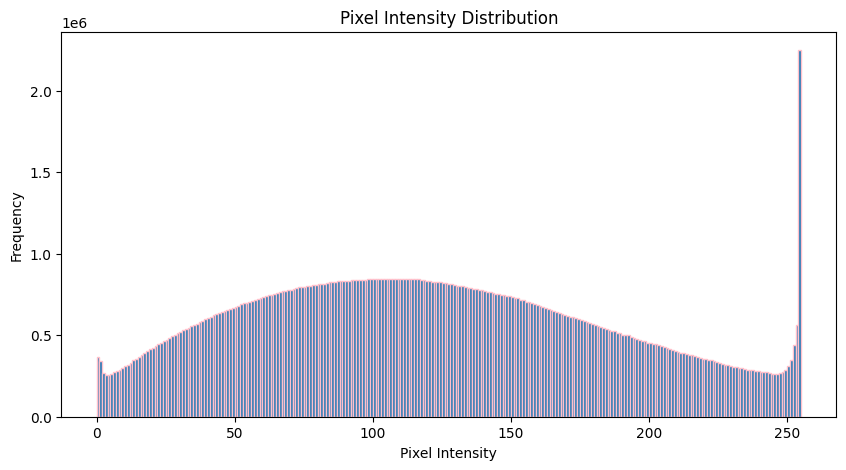

In [13]:
# Pixel Intensity Distribution
plt.figure(figsize=(10, 5))  # Create a new figure with a specific size for plotting

# Plot a histogram of pixel intensities across all images in the training dataset (X_train)
# Bins are set to range from 0 to 255, representing the possible intensity values of pixels
plt.hist(X_train.flatten(), bins=range(256), edgecolor='pink')

plt.xlabel('Pixel Intensity')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Pixel Intensity Distribution')  # Set title of the plot
plt.show()  # Display the plot


The graph shows two big jumps in how often different pixel brightness levels occur: one at very dark pixels (around 0 intensity) and another at very bright pixels (around 250 intensity). The middle part of the graph stays pretty much the same, meaning there are a lot of pixels with medium brightness. Basically, this graph tells us how pixel brightness is spread out in the dataset."

#Model Building

In [14]:

# This is the final layer achieved which provides a good balance of metrics between train and val set.
#The previous iterations had lesser layers and dropouts, on increaseing convolutional layers and dropouts, accuracy metrics took a hit
# But the model is not overfitting anymore

model = Sequential()  # Define a Sequential model

# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())  # Batch normalization layer to normalize the activations of the previous layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())  # Batch normalization layer

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))  # Max pooling layer to downsample the feature maps
# Dropout layer to prevent overfitting by randomly setting a fraction of input units to 0
model.add(Dropout(0.30))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPool2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Dropout(0.30))  # Dropout layer

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(MaxPool2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Dropout(0.30))  # Dropout layer

model.add(Flatten())  # Flatten layer to convert the 2D feature maps into a 1D vector
model.add(Dense(128, activation='relu'))  # Fully connected dense layer with ReLU activation
model.add(Dropout(0.25))  # Dropout layer
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units and softmax activation for multiclass classification

# Define custom metrics for model evaluation
METRICS = [
    'accuracy',  # Accuracy metric
    tf.keras.metrics.Precision(name='precision'),  # Precision metric
    tf.keras.metrics.Recall(name='recall')  # Recall metric
]

# Compile the model with categorical crossentropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)


In [15]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

The model uses convolutional layers, batch normalization, and dropout to prevent overfitting. As it trains, its performance improves, showing promising accuracy, precision, and recall on the validation dataset.

In [16]:
# Implement early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Did not implement early stopping because model took some time to get generalized with data to get improved result. Can be used in case of overfitting.

In [19]:
# Data augmentation for better model generalization
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_one_hot, batch_size=16)
steps_per_epoch = X_train.shape[0] // 16

cnn = model.fit(train_generator,
              epochs=2,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test_one_hot),
             )

Epoch 1/2
3125/3125 [==============================] - 1176s 376ms/step - loss: 1.3420 - accuracy: 0.5223 - precision: 0.7032 - recall: 0.3391 - val_loss: 1.2402 - val_accuracy: 0.5763 - val_precision: 0.7214 - val_recall: 0.4501
Epoch 2/2
3125/3125 [==============================] - 1190s 381ms/step - loss: 1.1285 - accuracy: 0.6078 - precision: 0.7565 - recall: 0.4608 - val_loss: 0.9592 - val_accuracy: 0.6814 - val_precision: 0.7776 - val_recall: 0.5777


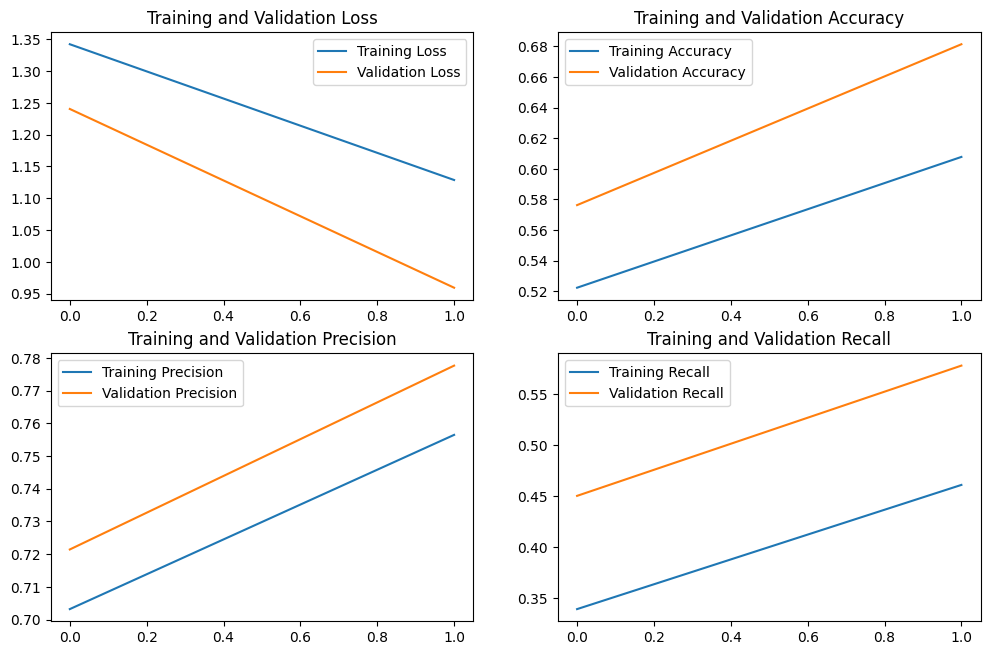

In [20]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(cnn.history['loss'], label='Training Loss')
plt.plot(cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(cnn.history['accuracy'], label='Training Accuracy')
plt.plot(cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(cnn.history['precision'], label='Training Precision')
plt.plot(cnn.history['val_precision'], label='Validation Precision')
plt.title('Training and Validation Precision')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(cnn.history['recall'], label='Training Recall')
plt.plot(cnn.history['val_recall'], label='Validation Recall')
plt.title('Training and Validation Recall')
plt.legend()

plt.show()


313/313 [==============================] - 53s 169ms/step - loss: 0.9592 - accuracy: 0.6814 - precision: 0.7776 - recall: 0.5777
Test Accuracy : 68.14%
313/313 [==============================] - 53s 168ms/step


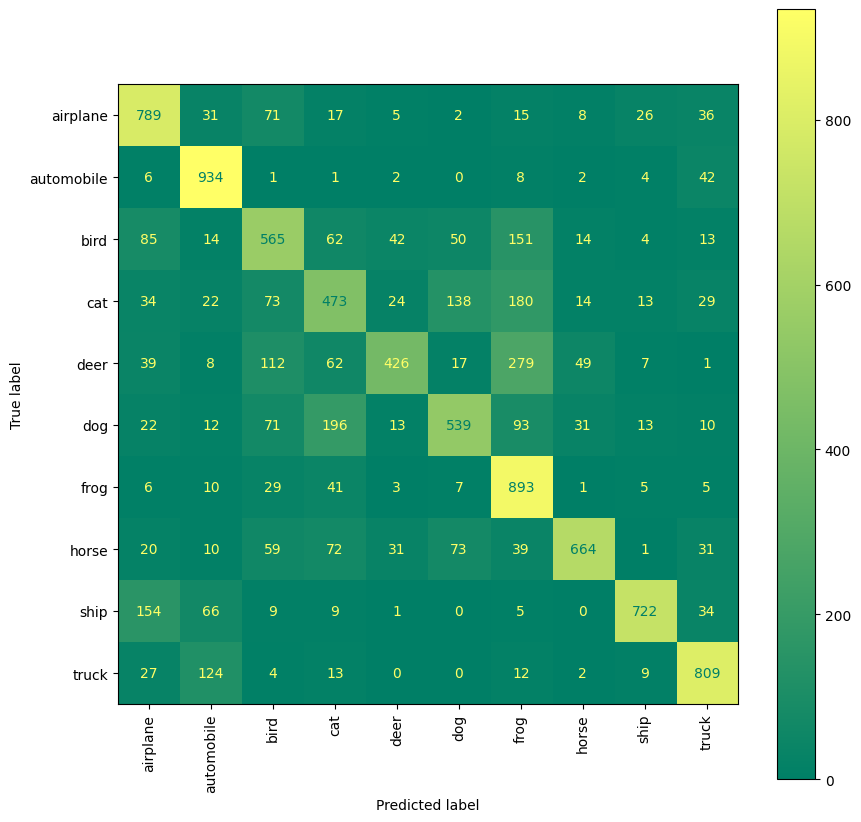

In [21]:
evaluation = model.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()


The model achieved an overall accuracy of 68.14%, meaning it correctly classified 68.14% of instances in the test dataset.